# Inciso 1

Theoretical Expected Value: 1
Sample Size: 100, Estimated Expected Value: 0.9015372688857072
Sample Size: 1000, Estimated Expected Value: 1.0205552867800791
Sample Size: 10000, Estimated Expected Value: 0.9923450317509802
Sample Size: 100000, Estimated Expected Value: 0.9984330777972417


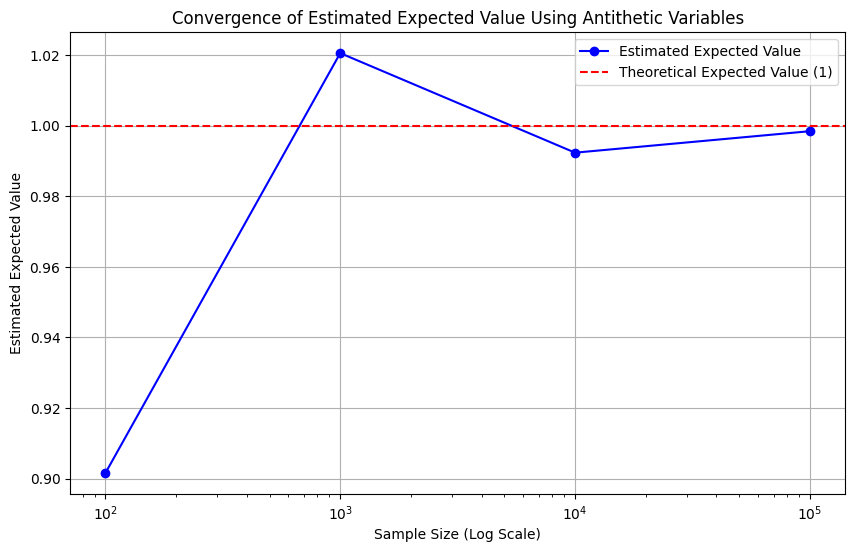

In [14]:
# Código revisado para imprimir el valor esperado teórico, el valor esperado estimado y los tamaños de muestra

import numpy as np
import matplotlib.pyplot as plt

# Simulación de Monte Carlo usando variables antitéticas
def monte_carlo_simulation(sample_sizes):
    expected_values = {}

    # Realizar simulación para cada tamaño de muestra
    for size in sample_sizes:
        # Generar números aleatorios uniformes U
        U = np.random.uniform(0.0, 1.0, size)

        # Variables exponenciales usando la transformación inversa
        X = -np.log(1 - U)

        # Variables antitéticas
        Y = -np.log(U)

        # Media de variables antitéticas
        antithetic_means = (X + Y) / 2

        # Estimación del valor esperado
        expected_values[size] = np.mean(antithetic_means)

    return expected_values

# Tamaños de muestra para la simulación
sample_sizes = [100, 1000, 10000, 100000]

# Ejecutar simulación
estimated_values = monte_carlo_simulation(sample_sizes)

# Valor esperado teórico para la distribución exponencial con lambda = 1
theoretical_expected_value = 1

# Imprimir los valores esperados estimados junto con el teórico
print(f"Theoretical Expected Value: {theoretical_expected_value}")
for size, estimated_value in estimated_values.items():
    print(f"Sample Size: {size}, Estimated Expected Value: {estimated_value}")

# Graficar los resultados estimados
plt.figure(figsize=(10, 6))
plt.plot(list(estimated_values.keys()), list(estimated_values.values()), 'o-b', label='Estimated Expected Value')
plt.axhline(y=theoretical_expected_value, color='r', linestyle='--', label='Theoretical Expected Value (1)')
plt.xscale('log')
plt.xlabel('Sample Size (Log Scale)')
plt.ylabel('Estimated Expected Value')
plt.title('Convergence of Estimated Expected Value Using Antithetic Variables')
plt.legend()
plt.grid(True)
plt.show()



# Inciso 2

Valor esperado real: 1.0
Valor esperado sin ajuste: 1.0028260353592586
Valor esperado ajustado: 0.9986700800454691
Error Estándar de la Media sin ajuste: 0.010034941813609833
Error Estándar de la Media con ajuste: 0.010034941813609833
Intervalo de confianza del 95% para el valor esperado ajustado: [0.99867193 0.99877182]


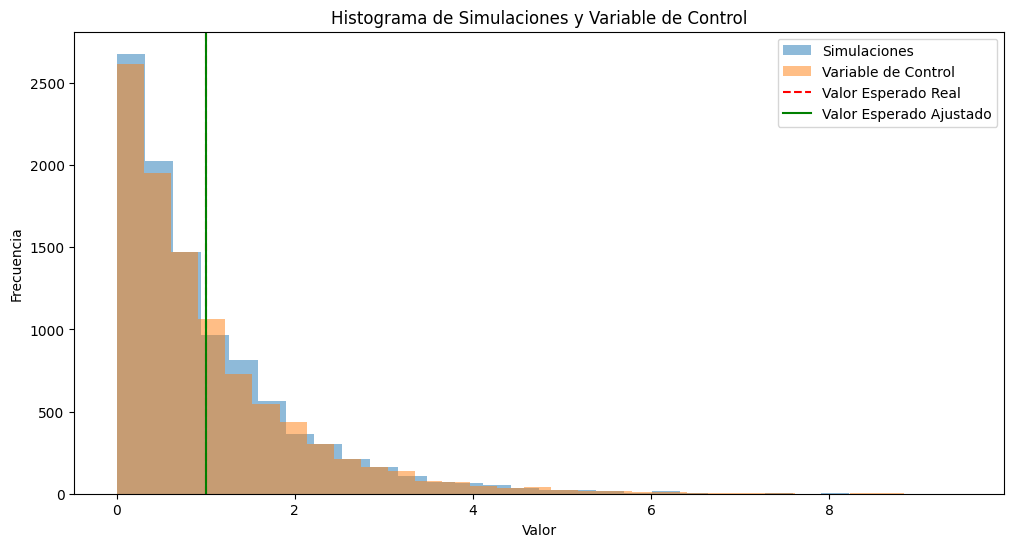

In [15]:
# Simulación de Monte Carlo con variables de control para estimar el valor esperado
# de una variable aleatoria exponencial con lambda = 1.

import numpy as np
import matplotlib.pyplot as plt

# Parámetros de la simulación
n_simulaciones = 10000  # Número de simulaciones
lambda_valor = 1  # Parámetro lambda de la distribución exponencial (tasa de llegada)

# Función para simular variables aleatorias exponenciales
def generar_exponencial(n, lambda_val):
    u = np.random.rand(n)  # Generar números aleatorios uniformes U(0,1)
    return -np.log(u) / lambda_val  # Transformación inversa

# Generar variables aleatorias exponenciales
simulaciones = generar_exponencial(n_simulaciones, lambda_valor)

# Calcular el valor esperado real
valor_esperado_real = 1 / lambda_valor

# Calcular el valor esperado de las simulaciones sin ajuste
valor_esperado_simulacion = np.mean(simulaciones)

# Utilizar una variable de control
# En este caso, se utiliza la misma distribución exponencial como variable de control
# porque su valor esperado es conocido y coincide con el valor esperado real.
variable_control = generar_exponencial(n_simulaciones, lambda_valor)
ajuste = valor_esperado_real - np.mean(variable_control)

# Calcular el valor esperado ajustado utilizando la variable de control
valor_esperado_ajustado = valor_esperado_simulacion + ajuste

# Imprimir los resultados
print(f"Valor esperado real: {valor_esperado_real}")
print(f"Valor esperado sin ajuste: {valor_esperado_simulacion}")
print(f"Valor esperado ajustado: {valor_esperado_ajustado}")

# Cálculo del Error Estándar de la Media (SEM)
sem_simulaciones = np.std(simulaciones) / np.sqrt(n_simulaciones)
sem_ajustado = np.std(simulaciones + ajuste) / np.sqrt(n_simulaciones)

# Imprimir los errores estándar
print(f"Error Estándar de la Media sin ajuste: {sem_simulaciones}")
print(f"Error Estándar de la Media con ajuste: {sem_ajustado}")

# Además, calcular el intervalo de confianza del 95% para el valor esperado ajustado
confianza = 0.95
z_score = np.abs(np.percentile(simulaciones, [(1 - confianza) / 2, confianza + (1 - confianza) / 2]))
intervalo_confianza = valor_esperado_ajustado + z_score * sem_ajustado

# Imprimir el intervalo de confianza
print(f"Intervalo de confianza del 95% para el valor esperado ajustado: {intervalo_confianza}")


# Graficar el histograma de las simulaciones y la variable de control
plt.figure(figsize=(12, 6))
plt.hist(simulaciones, bins=30, alpha=0.5, label='Simulaciones')
plt.hist(variable_control, bins=30, alpha=0.5, label='Variable de Control')
plt.axvline(x=valor_esperado_real, color='red', linestyle='--', label='Valor Esperado Real')
plt.axvline(x=valor_esperado_ajustado, color='green', linestyle='-', label='Valor Esperado Ajustado')
plt.title('Histograma de Simulaciones y Variable de Control')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()



Inciso 4

In [7]:
import numpy as np

np.random.seed(42)

# Número de simulaciones
num_simulations = 100000

# Inicializamos el contador para los casos en los que XY <= 3
count_XY_leq_3 = 0

for _ in range(num_simulations):
    # Generar un valor aleatorio para X a partir de una distribución exponencial con media 1
    X = np.random.exponential(scale=1)
    
    # Generar un valor aleatorio para Y a partir de una distribución exponencial con media X
    Y = np.random.exponential(scale=X)
    
    # Calcular XY
    XY = X * Y
    
    # Comprobar si XY <= 3 y actualizar el contador
    if XY <= 3:
        count_XY_leq_3 += 1

# Calcular la estimación de la probabilidad P(XY <= 3)
probability_XY_leq_3 = count_XY_leq_3 / num_simulations

print("Estimación de P(XY <= 3):", probability_XY_leq_3)

Estimación de P(XY <= 3): 0.85521
